# 1. Import and Install Dependencies

In [1]:
pip show opencv-python


Name: opencv-python
Version: 4.8.1.78
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\himanshu\anaconda3\Lib\site-packages
Requires: numpy, numpy, numpy, numpy, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
!python --version

Python 3.11.4


In [3]:
%pwd

'C:\\Users\\himanshu\\Documents\\ActionDetectionforSignLanguage-main\\ActionDetectionforSignLanguage-main'

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
import mediapipe as mp

def draw_styled_landmarks(image, results):
    drawing_spec_face = mp.solutions.drawing_utils.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
    drawing_spec_pose = mp.solutions.drawing_utils.DrawingSpec(color=(80, 22, 10), thickness=1, circle_radius=1)
    drawing_spec_hands = mp.solutions.drawing_utils.DrawingSpec(color=(121, 22, 76), thickness=1, circle_radius=1)

    # Draw face connections
    mp.solutions.drawing_utils.draw_landmarks(image, results.face_landmarks, mp.solutions.holistic.FACEMESH_TESSELATION, drawing_spec_face)

    # Draw pose connections
    mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp.solutions.holistic.POSE_CONNECTIONS, drawing_spec_pose)

    # Draw left hand connections
    mp.solutions.drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp.solutions.holistic.HAND_CONNECTIONS, drawing_spec_hands)

    # Draw right hand connections
    mp.solutions.drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp.solutions.holistic.HAND_CONNECTIONS, drawing_spec_hands)


In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.face_landmarks.landmark)

468

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

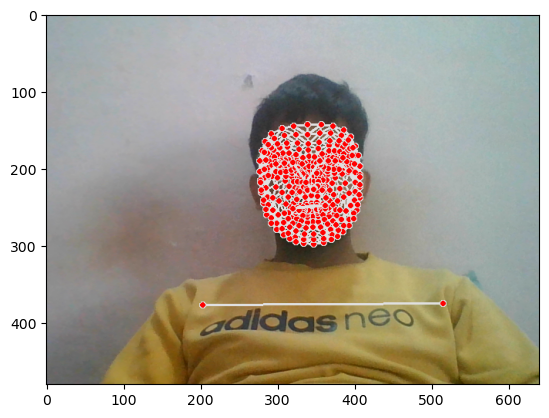

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
results.left_hand_landmarks

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
len(pose)

33

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
face

array([ 0.53897804,  0.51159197, -0.03167182, ...,  0.60218734,
        0.3894012 ,  0.01958588])

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [21]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 0.52724844,  0.45427001, -1.2290709 , ...,  0.        ,
        0.        ,  0.        ])

In [25]:
468*3+33*4+21*3+21*3

1662

In [26]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 0.52724844,  0.45427001, -1.2290709 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [28]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'Father','Mother','Yes','No','Help','A','B','C'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [29]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [30]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
# ... (previous code)

# Function to load the last saved state
def load_state():
    # Add your logic to load the last saved state from a file or database
    last_action = "A"  # Replace with the actual last action
    last_sequence = 0   # Replace with the actual last sequence
    last_frame_num = 0  # Replace with the actual last frame number
    return last_action, last_sequence, last_frame_num

# Function to save the current state
def save_state(action, sequence, frame_num):
    # Add your logic to save the current state to a file or database
    pass

# Get the last saved state
last_action, last_sequence, last_frame_num = load_state()

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Flag to start collecting data
    start_collecting = False
    
    # Loop through actions
    for action in actions:
        # Check if the current action is the last action
        if action == last_action:
            # Set the flag to start collecting data
            start_collecting = True
        
        # Continue only if the start_collecting flag is True
        if start_collecting:
            # Loop through sequences
            for sequence in range(no_sequences):
                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):
                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)

                    # Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(2000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)

                    # Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Save the current state
                    save_state(action, sequence, frame_num)

                    # Break gracefully
                    key = cv2.waitKey(10)
                    if key == ord('q'):
                        break

                # Break out of the sequence loop if 'q' is pressed
                if key == ord('q'):
                    break

            # Break out of the action loop if 'q' is pressed
            if key == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()


In [36]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'hello': 0,
 'thanks': 1,
 'Father': 2,
 'Mother': 3,
 'Yes': 4,
 'No': 5,
 'Help': 6,
 'A': 7,
 'B': 8,
 'C': 9}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape

(300, 30, 1662)

In [34]:
np.array(labels).shape

(300,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(300, 30, 1662)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [40]:
y_test.shape

(30, 10)

# 7. Build and Train LSTM Neural Network

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [54]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [77]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [78]:
res = [.7, 0.2, 0.1]

In [79]:
actions[np.argmax(res)]

'hello'

In [80]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [81]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
9/9 [==============================] - 6s 61ms/step - loss: 2.7976 - categorical_accuracy: 0.0963
Epoch 2/200
9/9 [==============================] - 1s 61ms/step - loss: 2.5124 - categorical_accuracy: 0.0852
Epoch 3/200
9/9 [==============================] - 1s 60ms/step - loss: 2.2983 - categorical_accuracy: 0.1074
Epoch 4/200
9/9 [==============================] - 1s 61ms/step - loss: 2.1863 - categorical_accuracy: 0.1963
Epoch 5/200
9/9 [==============================] - 1s 60ms/step - loss: 2.1622 - categorical_accuracy: 0.1889
Epoch 6/200
9/9 [==============================] - 1s 62ms/step - loss: 2.0747 - categorical_accuracy: 0.2148
Epoch 7/200
9/9 [==============================] - 1s 57ms/step - loss: 1.9316 - categorical_accuracy: 0.2481
Epoch 8/200
9/9 [==============================] - 1s 61ms/step - loss: 1.8686 - categorical_accuracy: 0.3111
Epoch 9/200
9/9 [==============================] - 1s 63ms/step - loss: 1.8054 - categorical_accuracy: 0.3259
Epoch 10/2

9/9 [==============================] - 1s 79ms/step - loss: 1.5490 - categorical_accuracy: 0.3481
Epoch 148/200
9/9 [==============================] - 1s 82ms/step - loss: 1.5028 - categorical_accuracy: 0.3852
Epoch 149/200
9/9 [==============================] - 1s 85ms/step - loss: 1.4165 - categorical_accuracy: 0.3926
Epoch 150/200
9/9 [==============================] - 1s 85ms/step - loss: 1.3198 - categorical_accuracy: 0.4889
Epoch 151/200
9/9 [==============================] - 1s 88ms/step - loss: 1.3635 - categorical_accuracy: 0.4593
Epoch 152/200
9/9 [==============================] - 1s 81ms/step - loss: 1.3719 - categorical_accuracy: 0.4370
Epoch 153/200
9/9 [==============================] - 1s 84ms/step - loss: 1.3167 - categorical_accuracy: 0.4963
Epoch 154/200
9/9 [==============================] - 1s 81ms/step - loss: 1.2667 - categorical_accuracy: 0.5296
Epoch 155/200
9/9 [==============================] - 1s 82ms/step - loss: 1.1957 - categorical_accuracy: 0.5481
Epoch 

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 596906 (2.28 MB)
Trainable params: 59690

# 8. Make Predictions

In [83]:
res = model.predict(X_test)

1/1 [==============================] - 0s 455ms/step


In [84]:
actions[np.argmax(res[4])]

'Help'

In [85]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [86]:
model.save('action.h')

INFO:tensorflow:Assets written to: action.h\assets


INFO:tensorflow:Assets written to: action.h\assets


In [87]:
model.load_weights('action.h')

# 10. Evaluation using Confusion Matrix and Accuracy

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [89]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 61ms/step


In [90]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [91]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[29,  0],
        [ 0,  1]],

       [[25,  2],
        [ 1,  2]],

       [[25,  0],
        [ 2,  3]],

       [[26,  1],
        [ 3,  0]],

       [[21,  6],
        [ 0,  3]],

       [[27,  1],
        [ 0,  2]],

       [[27,  0],
        [ 2,  1]],

       [[20,  4],
        [ 4,  2]],

       [[25,  1],
        [ 3,  1]]], dtype=int64)

In [92]:
accuracy_score(ytrue, yhat)

0.5

# 11. Test in Real Time

In [93]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [94]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [95]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [96]:
len(sequence)

TypeError: object of type 'int' has no len()

In [97]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [98]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [99]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [100]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))